# New Skymap Features

Sean McGuire

In [6]:
import lsdb
import healpy as hp

In [2]:
from distributed import Client

client = Client(n_workers=6, memory_limit='10GB', local_directory="/data3/epyc/projects3/sean_hipscat", dashboard_address=':39948', threads_per_worker=1)
client

/astro/users/seanmcgu/anaconda3/envs/lsdb/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 39948 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40835 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:40835/status,
Dashboard: http://127.0.0.1:40835/status,Workers: 6
Total threads: 6,Total memory: 55.88 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41999,Workers: 6
Dashboard: http://127.0.0.1:40835/status,Total threads: 6
Started: Just now,Total memory: 55.88 GiB
Comm: tcp://127.0.0.1:36513,Total threads: 1
Dashboard: http://127.0.0.1:36140/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:44823,


In [3]:
ztf = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_dr14")
ztf

,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
npartitions=2352,,,,,,,,,,,,,,,
0,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32
18014398509481984,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13830554455654793216,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
def density(df, pixel):
    return len(df) / hp.nside2pixarea(2 ** pixel.order)

def length(df, pixel):
    return len(df)

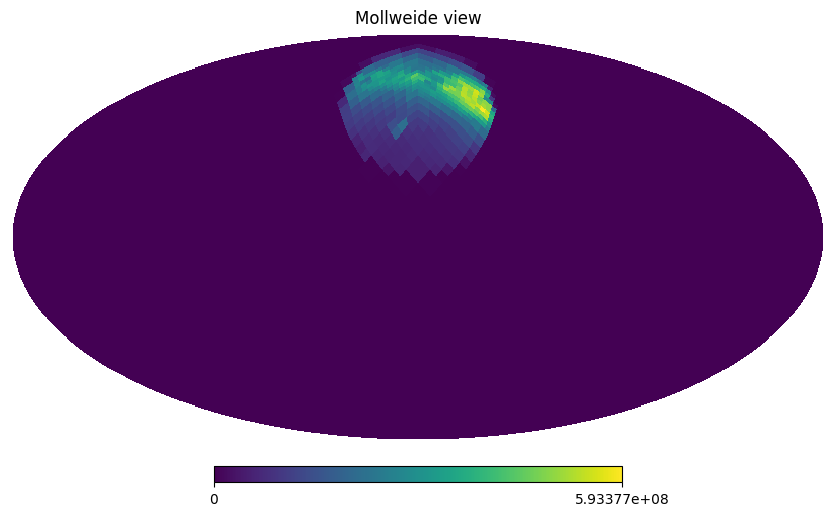

In [16]:
ztf.cone_search(0, 50, 100000).skymap(density)

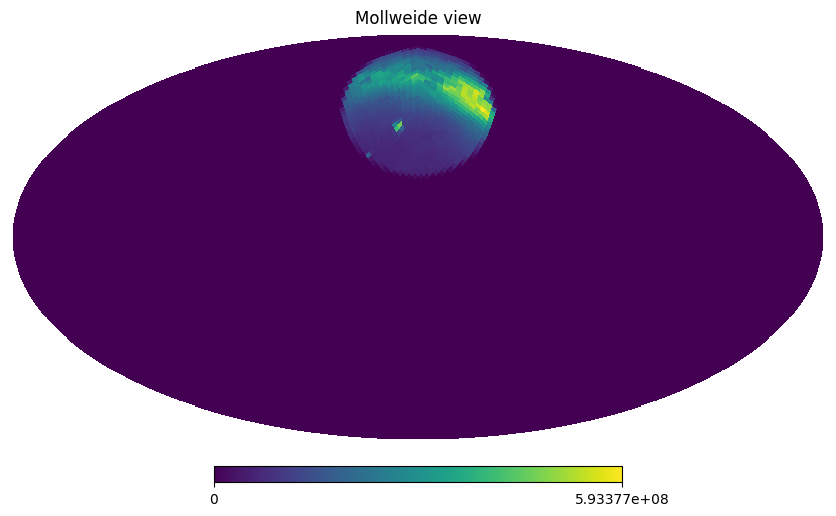

In [17]:
ztf.cone_search(0, 50, 100000).skymap(density, order=5)

In [19]:
ztf.cone_search(0, 50, 100000).skymap_histogram(density, order=5)

array([0., 0., 0., ..., 0., 0., 0.])

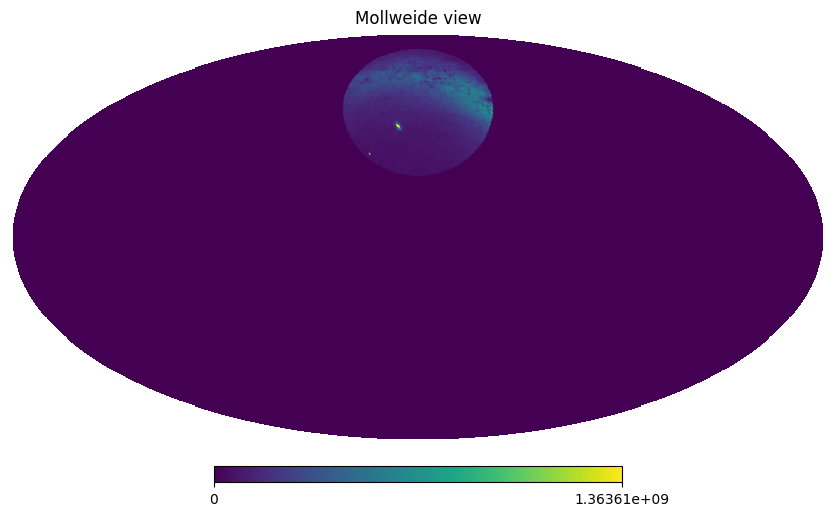

In [15]:
ztf.cone_search(0, 50, 100000).skymap(density, order=7)

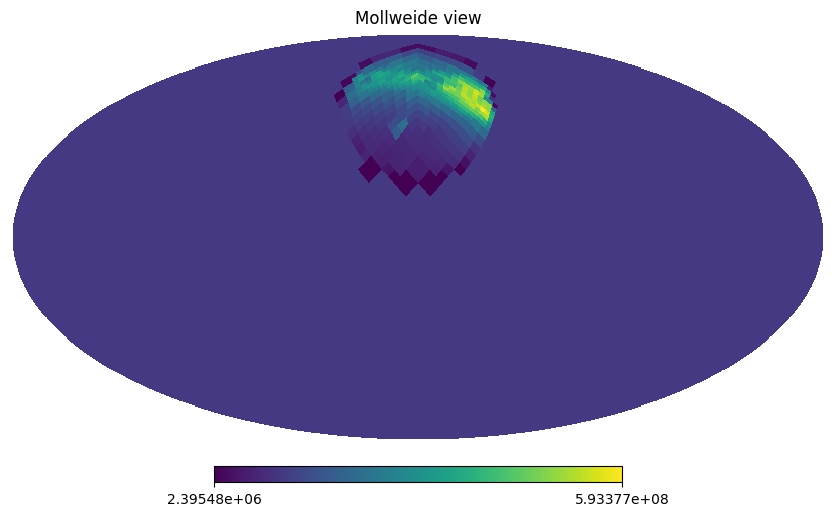

In [18]:
ztf.cone_search(0, 50, 100000).skymap(density, default_value=100000000)